<a href="https://colab.research.google.com/github/Rahafalnabhani/BootCamp-DataEngineering/blob/main/Redis_NoSql_Features_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fast in-memory database for IoT data
To demonstrate Redis as a fast in-memory database for IoT data, we can use an open-source IoT dataset. For instance, we can use the "Environmental Sensor Telemetry Data" dataset

## Create a redis database

We will use a Redis managed service provides by [link text](https://app.redislabs.com/). The free tier.

create an account on https://app.redislabs.com/ and follow the instructions to create a redis database.

In addition, download the desktop client to manage and view our database.
From the connect button on the redis database panel, we will:
1.   download the desktop
2. get the connection string
3. get the connection details wraped in python code to use it with the colab notebook.

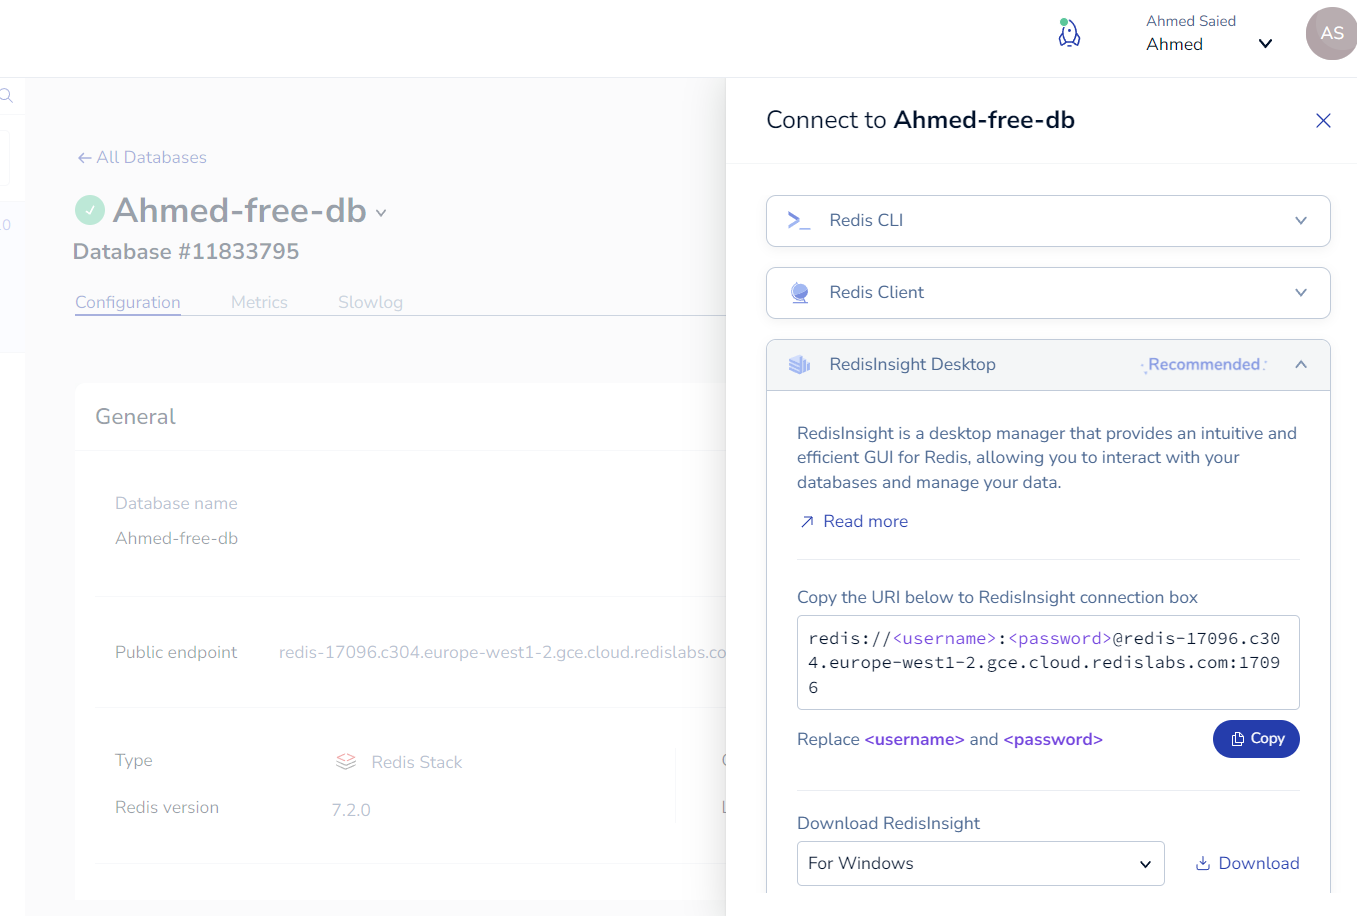

In [ ]:
!pip install redis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
import redis
r = redis.Redis(
  host='redis-17096.c304.europe-west1-2.gce.cloud.redislabs.com',
  port=17096,
  password='j97WRy8y4nHjJoyQB3gK778UHGXy5pEa')

In [ ]:
import json

In [ ]:
# Let's say we have some feature data for a machine learning model
features = {
    'user_1': {
        'age': 30,
        'click_rate': 0.123,
        'purchase_history': [1, 2, 5],
    },
    'user_2': {
        'age': 25,
        'click_rate': 0.456,
        'purchase_history': [2, 3],
    },
}

# We can store this data in Redis by serializing it as JSON
for user_id, feature_data in features.items():
    r.set(user_id, json.dumps(feature_data))

In [ ]:
# We can then retrieve this feature data from Redis when we need it
user_id = 'user_1'
feature_data = json.loads(r.get(user_id))

print(feature_data)  # Outputs: {'age': 30, 'click_rate': 0.123, 'purchase_history': [1, 2, 5]}

{'age': 30, 'click_rate': 0.123, 'purchase_history': [1, 2, 5]}


## Environmental Sensor Telemetry Data dataset
To demonstrate Redis as a fast in-memory database for IoT data, we can use an open-source IoT dataset. For instance, we can use the "Environmental Sensor Telemetry Data" dataset

In [ ]:
import pandas as pd
import pickle

The dataset is on Kaggle. we will download it directly from the website. First we need to be able to login to Kaggle:
* signup to kaggle and get a kaggle.json file from profile->account->create new token
* upload token to the notebook
* prepare kaggle lib to read it
* download the dataset
* uncompress it
* and finally load it in a dataframe

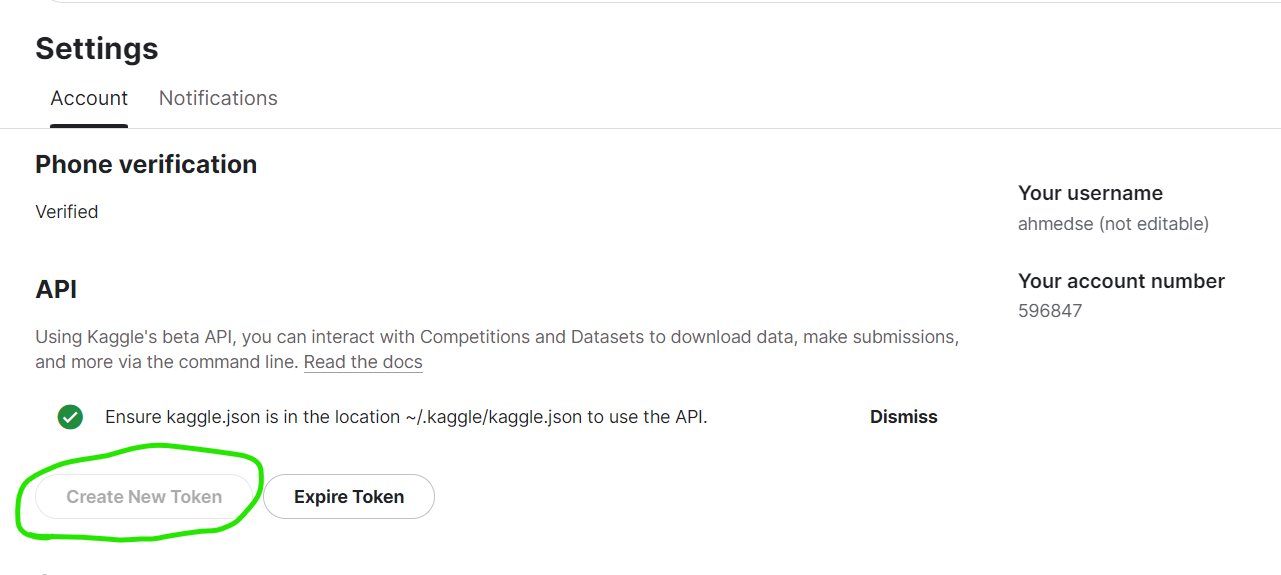

In [ ]:
 !pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ahmedse","key":"c80b905c5ad767119e5675be2231fd7f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          11617        462  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           3665        136  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            770      

In [ ]:
!kaggle datasets download -d garystafford/environmental-sensor-data-132k

 45% 3.00M/6.74M [00:00<00:00, 11.8MB/s]
100% 6.74M/6.74M [00:00<00:00, 20.6MB/s]


In [ ]:
!unzip environmental-sensor-data-132k.zip

Archive:  environmental-sensor-data-132k.zip
  inflating: iot_telemetry_data.csv  


## Load and Store Data:

This script reads data from the CSV file, loads it into a pandas DataFrame, and then stores each row in the DataFrame as a separate entry in Redis.

In [ ]:
data = pd.read_csv('/content/iot_telemetry_data.csv')

In [ ]:
data.head()


,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [ ]:
# Store the data in Redis
for i, row in data.iloc[:100].iterrows():
    r.set(f'row_{i}', pickle.dumps(dict(row)))

## Retrieve Data:

This script retrieves a row from the DataFrame stored in Redis.

In [ ]:
# Retrieve a row from Redis
row = pickle.loads(r.get('row_0'))
print(row)

{'ts': 1594512094.3859746, 'device': 'b8:27:eb:bf:9d:51', 'co': 0.0049559386483912, 'humidity': 51.0, 'light': False, 'lpg': 0.0076508222705571, 'motion': False, 'smoke': 0.0204112701224129, 'temp': 22.7}
